In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 +np.random.randn(100, 1)  # quadratic equation used y=0.5x^2+1.5x+2+outliers

Text(0, 0.5, 'y dataset')

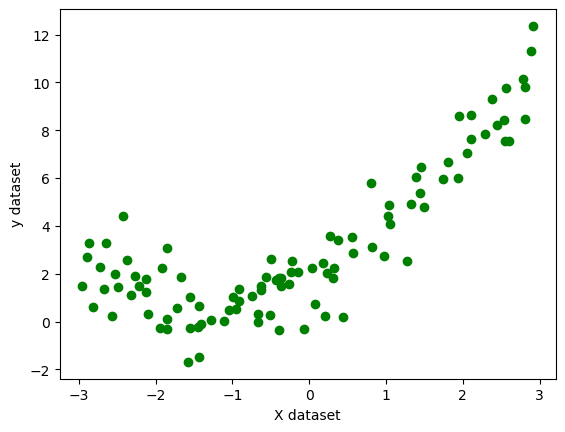

In [12]:
plt.scatter(X,y,c='g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
## implement Simple Linear Regression

from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()
regression1.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression1.predict(X_test))
score

0.6642353020468081

Text(0, 0.5, 'y dataset')

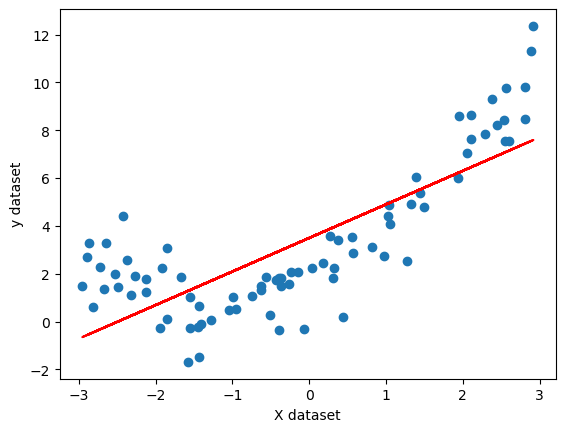

In [16]:
# Visualize the model

plt.plot(X_train, regression1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [17]:
## apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [52]:
X_train_poly

array([[ 1.00000000e+00, -9.98904160e-01,  9.97809521e-01],
       [ 1.00000000e+00, -1.57430470e+00,  2.47843529e+00],
       [ 1.00000000e+00, -2.81144621e+00,  7.90422977e+00],
       [ 1.00000000e+00, -2.72268680e+00,  7.41302340e+00],
       [ 1.00000000e+00,  1.44717544e+00,  2.09431674e+00],
       [ 1.00000000e+00, -7.42129579e-01,  5.50756313e-01],
       [ 1.00000000e+00, -9.52596653e-01,  9.07440383e-01],
       [ 1.00000000e+00,  1.32357169e+00,  1.75184202e+00],
       [ 1.00000000e+00, -2.12289746e+00,  4.50669362e+00],
       [ 1.00000000e+00,  4.40728507e-01,  1.94241617e-01],
       [ 1.00000000e+00, -1.28155868e+00,  1.64239264e+00],
       [ 1.00000000e+00,  2.10279986e+00,  4.42176725e+00],
       [ 1.00000000e+00,  5.54662294e-01,  3.07650261e-01],
       [ 1.00000000e+00,  1.03072723e+00,  1.06239863e+00],
       [ 1.00000000e+00, -2.12698028e+00,  4.52404513e+00],
       [ 1.00000000e+00, -6.22584636e-01,  3.87611629e-01],
       [ 1.00000000e+00, -2.64683127e-01

In [53]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.852878250309491


In [54]:
regression.coef_, regression.intercept_

(array([[0.        , 1.4330865 , 0.57909211]]), array([1.68817866]))

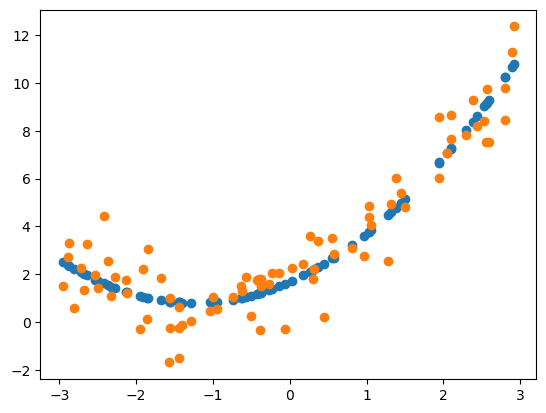

In [55]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [58]:
# prediction for new data
X_new =  np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

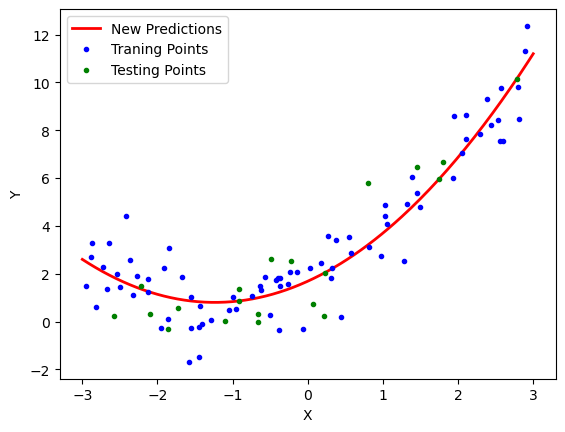

In [66]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth = 2, label="New Predictions")
plt.plot(X_train, y_train, "b.", label="Traning Points")
plt.plot(X_test, y_test, "g.", label="Testing Points")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## Pipeline Concepts

In [67]:
from sklearn.pipeline import Pipeline

In [91]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    plt.plot(X_new, y_pred_new, "r-", linewidth = 2, label=f"Degree {degree}")
    plt.plot(X_train, y_train, "b.", linewidth = 3)
    plt.plot(X_test, y_test, "g.", linewidth = 3)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc="upper left")
    

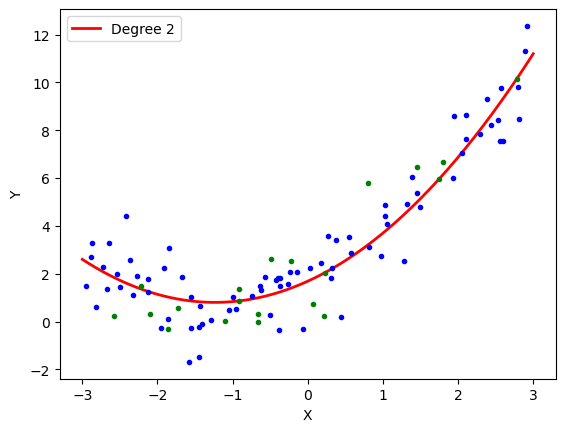

In [92]:
poly_regression(2)